In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

# **Loading Dataset**

In [2]:
creditcard = pd.read_csv('creditcard.csv')

**Exploratory Data Analysis**


In [3]:
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
creditcard.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
creditcard.shape

(284807, 31)

In [6]:
creditcard[['Amount', 'Time', 'Class']].describe()

,Amount,Time,Class
count,284807.000000,284807.000000,284807.000000
mean,88.349619,94813.859575,0.001727
std,250.120109,47488.145955,0.041527
min,0.000000,0.000000,0.000000
25%,5.600000,54201.500000,0.000000
50%,22.000000,84692.000000,0.000000
75%,77.165000,139320.500000,0.000000
max,25691.160000,172792.000000,1.000000


In [7]:
creditcard.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
creditcard.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [9]:
creditcard.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
null_columns = pd.DataFrame ({'Columns': creditcard.isna().sum().index, 'No. Null values': creditcard.isna().sum().values, 'Percentage': creditcard.isna().sum().values/creditcard.shape[0]})

In [12]:
null_columns

,Columns,No. Null values,Percentage
0,Time,0,0.0
1,V1,0,0.0
2,V2,0,0.0
3,V3,0,0.0
4,V4,0,0.0
5,V5,0,0.0
6,V6,0,0.0
7,V7,0,0.0
8,V8,0,0.0
9,V9,0,0.0


**Percentage of total not fraud transaction**

In [13]:
nfcount = 0
notFraud = creditcard['Class']
for i in range(len(notFraud)):
    if notFraud[i] == 0:
        nfcount = nfcount + 1

nfcount
per_nf = (nfcount/len(notFraud))*100
print('percentage of total not fraud transaction in the dataset: ', per_nf)


percentage of total not fraud transaction in the dataset:  99.82725143693798


**Percentage of total fraud transaction**

In [14]:
fcount = 0
Fraud = creditcard['Class']
for i in range(len(Fraud)):
    if Fraud[i] == 1:
        fcount = fcount + 1

fcount
per_f = (fcount/len(Fraud))*100
print('percentage of total fraud transaction in the dataset: ', per_f)


percentage of total fraud transaction in the dataset:  0.1727485630620034


In [15]:
plot_data = pd.DataFrame()
plot_data['Fraud Transaction'] = Fraud
plot_data['Genuine Transaction'] = notFraud
plot_data

,Fraud Transaction,Genuine Transaction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
284802,0,0
284803,0,0
284804,0,0
284805,0,0


**Visualizations of Data**

<Axes: title={'center': 'Bar plot for Fraud VS Genuine transaction'}, xlabel='Fraud Transaction', ylabel='Genuine Transaction'>

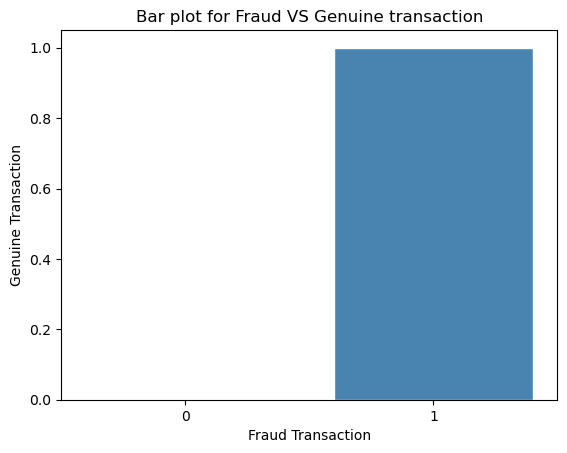

In [16]:
plt.title('Bar plot for Fraud VS Genuine transaction')
sns.barplot(x = 'Fraud Transaction', y = 'Genuine Transaction', data = plot_data, palette = 'Blues', edgecolor = 'w')

#from the graph, the ratio of genuine transactions are higher than fraud transactions


Text(0.5, 1.0, 'Time Vs Amount')

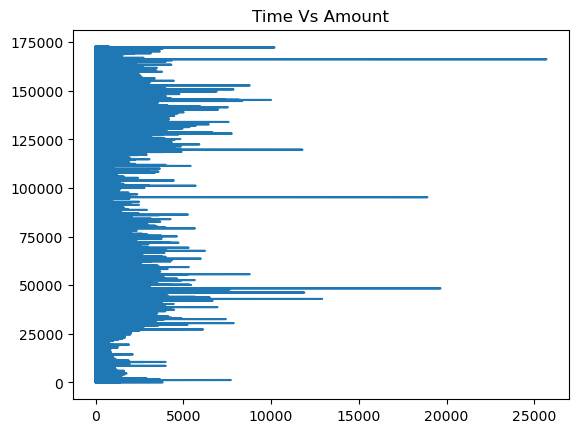

In [17]:
x = creditcard['Amount']
y = creditcard['Time']
plt.plot(x,y)
plt.title('Time Vs Amount')

C:\Users\HP\AppData\Local\Temp\ipykernel_17140\3289187835.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard['Amount'], color = 'red');


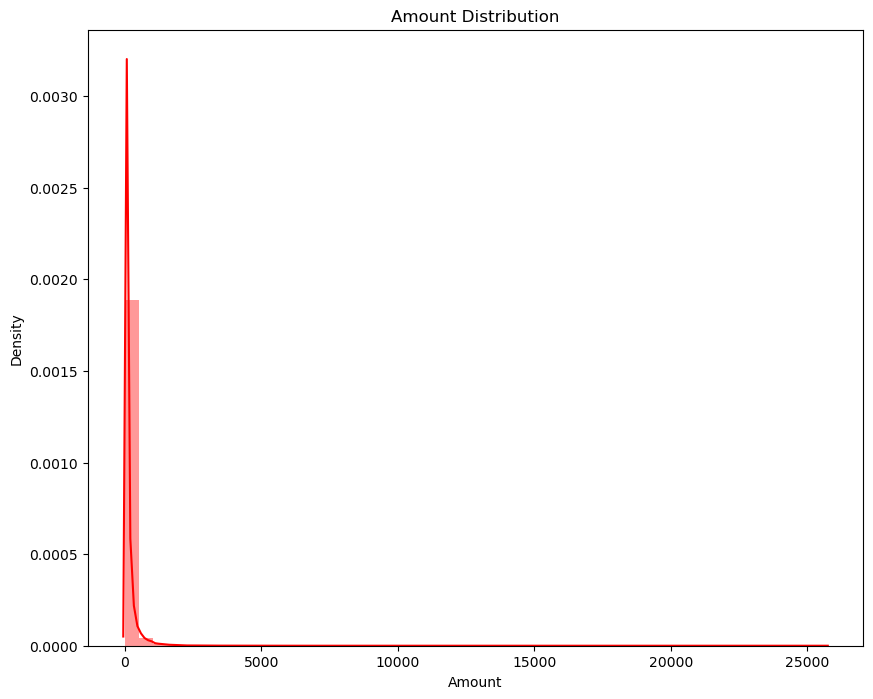

In [20]:
plt.figure(figsize = (10,8), )
plt.title('Amount Distribution')

sns.distplot(creditcard['Amount'], color = 'red');


From this amount distribution curve it is shown that the number high amount transactions are very slow. So there is a high probability for huge transactions to fraudulent

**Outliers**

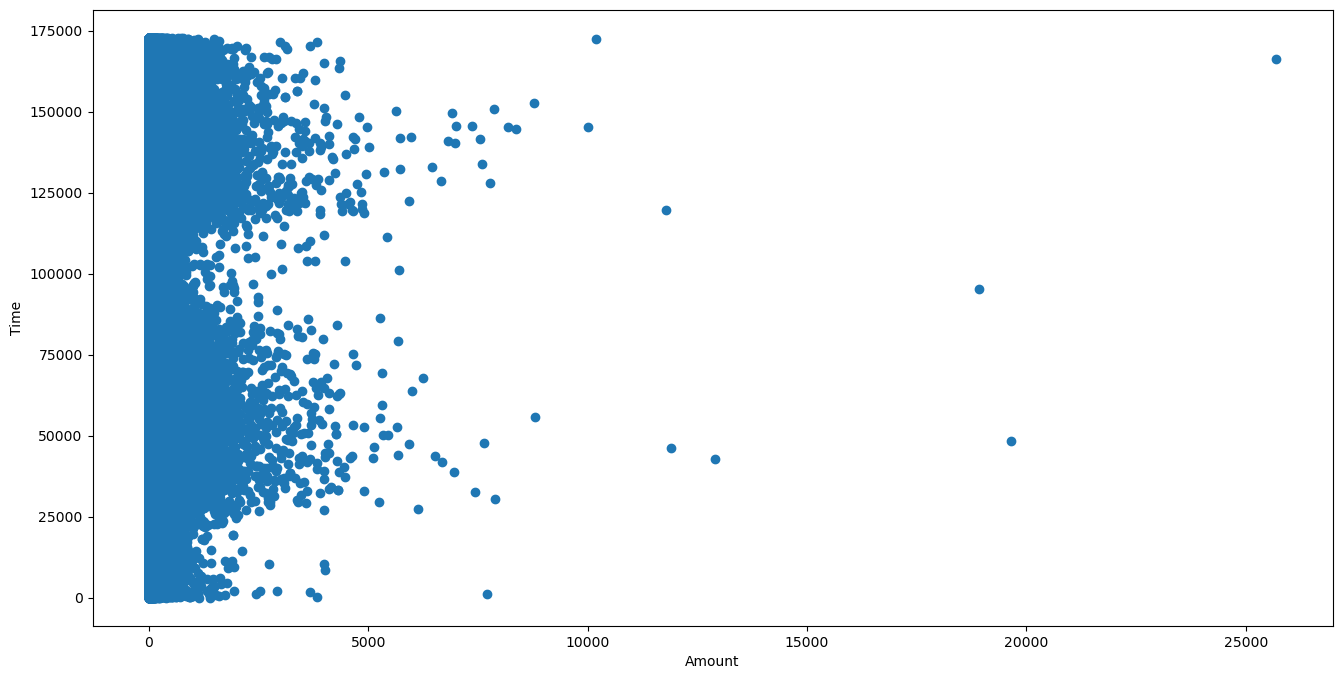

In [18]:
fig, ax = plt.subplots(figsize = (16, 8))
ax.scatter(creditcard['Amount'], creditcard['Time'])
ax.set_xlabel('Amount')
ax.set_ylabel('Time')
plt.show()


**Correlation Heatmap Analysis**

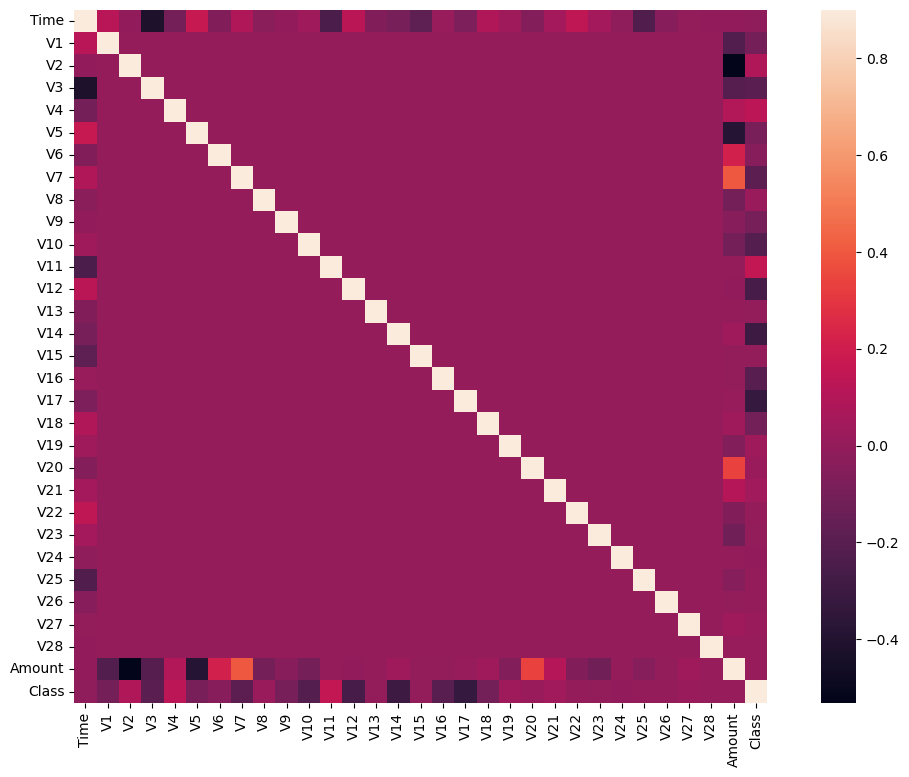

In [19]:
#Correlation matrix
correlation_matrix = creditcard.corr()
fig = plt.figure(figsize = (14, 9))
sns.heatmap(correlation_matrix, vmax = .9, square = True)
plt.show()

**Splitting Data**

In [20]:
x = creditcard.drop(['Class'], axis = 1) #dropping the target variable
y = creditcard['Class']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state =42)





In [21]:
logisticreg = LogisticRegression()
logisticreg.fit(xtrain, ytrain)




C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_pred = logisticreg.predict(xtest)
accuracy = logisticreg.score(xtest, ytest)


**Confusion Matrix**

-Positive(P): Observation is positive (for example: The transaction is genuine).
-Negative(N): Observation is not positive (for example: the transaction is not genuine.
-True Positive(TP): Observation is positive, and is predicted to be positive.
-False Negative(FN): Observation is positive, but is predicted negative
-True Negative(TN): Observation is negative, and is predicted negative
-False Positive(FP): Observation is negative, but is predicted positive.








In [24]:
cm = metrics.confusion_matrix(ytest, y_pred)
print(cm)


[[56833    31]
 [   42    56]]


**Accuracy calculation**

In [25]:
print('Accuracy score of the Logistic regression model: ', accuracy*100, '%')

Accuracy score of the Logistic regression model:  99.87184438748639 %
